This notebook is a simulation of 5000 ms of the Soleus muscle (800 motoneurons) with injected current. 

In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook 
import numpy as np
from scipy import signal
from scipy import stats

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool

In [2]:
conf = Configuration('confEMGCoherenceTA.rmto')
conf.simDuration_ms = 5000 # Here I change simulation duration without changing the Configuration file.

In [3]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)

In [4]:
pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = MotorUnitPool(conf, 'SOL')

Motor Unit Pool SOL built
Motor Unit Pool SOL built


In [5]:
tic = time.clock()
for i in xrange(0, len(t)-1):
    current1 = 4 + np.random.randn(1)
    current2 = 4 + np.random.randn(1)
    for j in xrange(len(pools[0].unit)):
        pools[0].unit[j].iInjected[1] = (current1 + 0.7*current2)/1.2
    for j in xrange(len(pools[1].unit)):
        pools[1].unit[j].iInjected[1] = (0.7*current1 + current2)/1.2
    pools[0].atualizeMotorUnitPool(t[i])
    pools[1].atualizeMotorUnitPool(t[i])
toc = time.clock()
print str(toc - tic) + ' seconds'

3206.032513 seconds


In [6]:
pools[0].listSpikes()
pools[1].listSpikes()

<IPython.core.display.Javascript object>


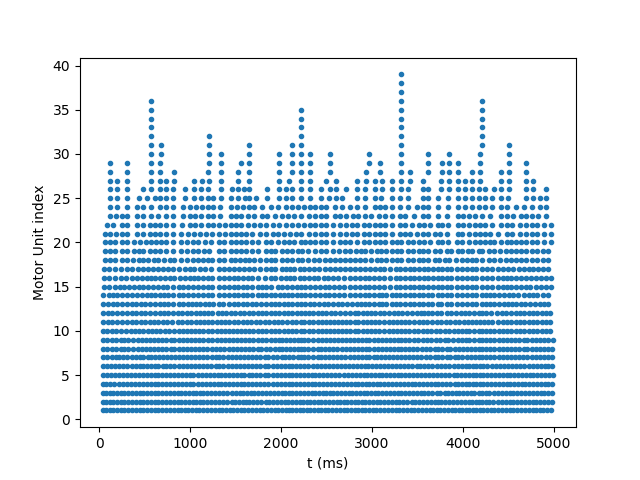

In [7]:
plt.figure()
plt.plot(pools[0].poolTerminalSpikes[:, 0],
         pools[0].poolTerminalSpikes[:, 1] + 1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')

<IPython.core.display.Javascript object>


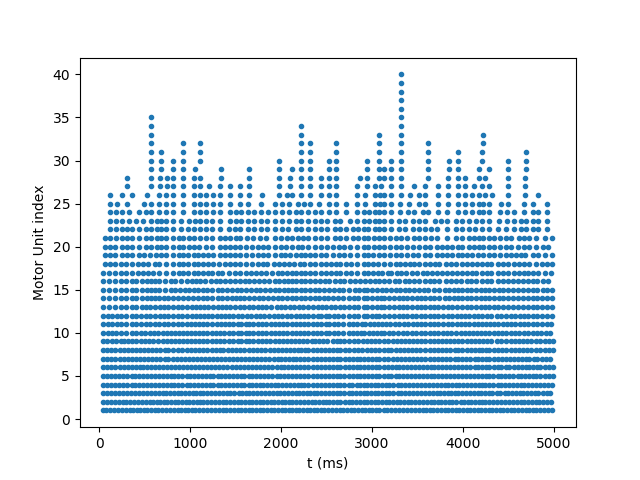

In [8]:
plt.figure()
plt.plot(pools[1].poolTerminalSpikes[:, 0],
         pools[1].poolTerminalSpikes[:, 1] + 1, '.')
plt.xlabel('t (ms)')
plt.ylabel('Motor Unit index')

<IPython.core.display.Javascript object>


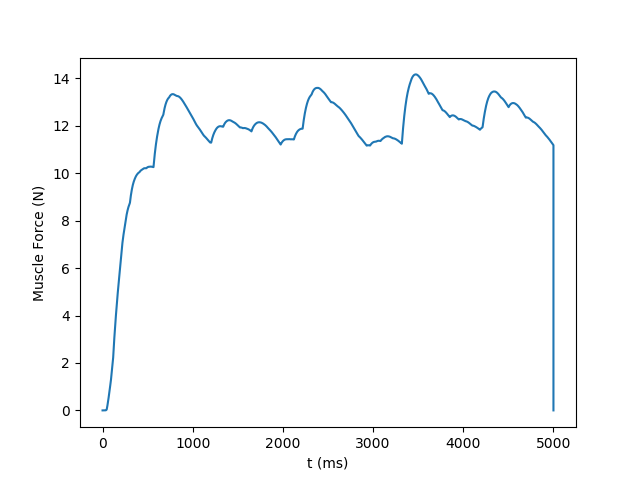

In [9]:
plt.figure()
plt.plot(t, pools[0].Muscle.force, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Force (N)')

<IPython.core.display.Javascript object>


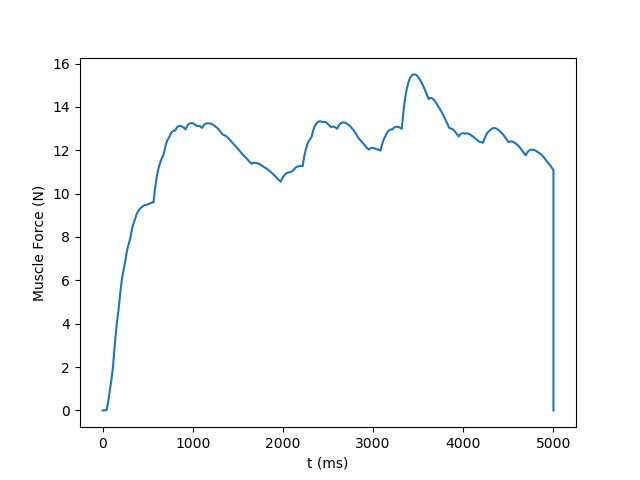

In [16]:
plt.figure()
plt.plot(t, pools[1].Muscle.force, '-')
plt.xlabel('t (ms)')
plt.ylabel('Muscle Force (N)')

In [10]:
pools[0].getMotorUnitPoolEMG()

<IPython.core.display.Javascript object>


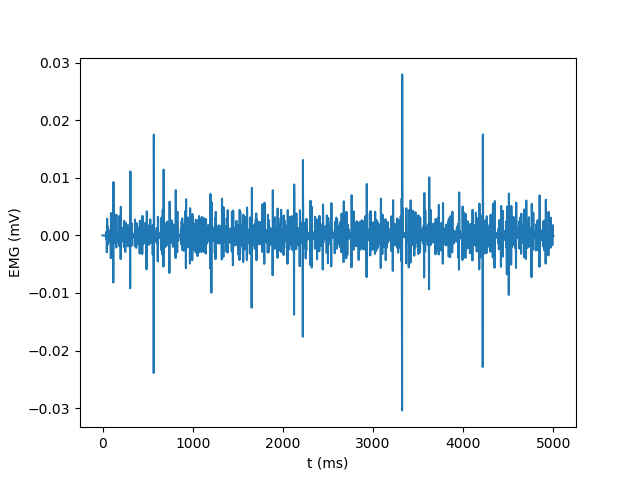

In [11]:
plt.figure()
plt.plot(t, pools[0].emg, '-')
plt.xlabel('t (ms)')
plt.ylabel('EMG (mV)')

In [12]:
pools[1].getMotorUnitPoolEMG()

<IPython.core.display.Javascript object>


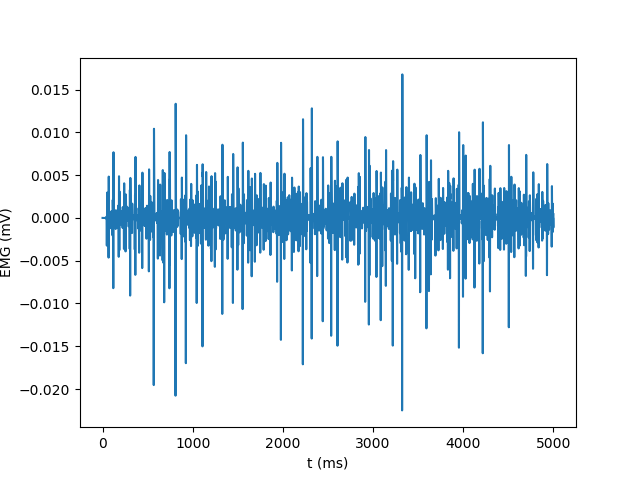

In [13]:
plt.figure()
plt.plot(t, pools[1].emg, '-')
plt.xlabel('t (ms)')
plt.ylabel('EMG (mV)')

In [14]:
window = 2000
fs = 1/0.00005
f, coherence = signal.coherence(signal.detrend(pools[0].emg[int(round(1000/0.05)):-1]), 
                                signal.detrend(pools[1].emg[int(round(1000/0.05)):-1]), 
                                fs=fs, window='hann', nperseg=window, noverlap=None, nfft=window, detrend='constant', axis=0)
divisions = len(pools[0].emg[int(round(1000/0.05)):-1])/window;
erroCoh = stats.f.ppf(0.95,2, 2*(divisions-1))/(divisions - 1 + stats.f.ppf(0.95,2,2*(divisions-1)));

<IPython.core.display.Javascript object>


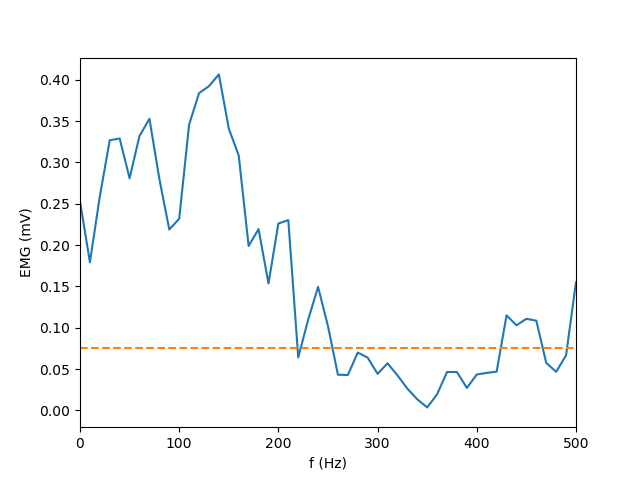

(0, 500)

In [15]:
plt.figure()
plt.plot(f, coherence,'-', f, erroCoh*np.ones(len(f)),'--')
plt.xlabel('f (Hz)')
plt.ylabel('EMG (mV)')
plt.xlim((0,500))